In this notebook, we shall build some baseline models without in-depth analysis. In subsequent notebooks, we will do more indepth analysis and improve our baseline models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
print("amrit")

amrit


In [3]:
data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("shape: ", data.shape)
pd.set_option("display.max_columns",None)
data

shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.isna().sum()    # checking for null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.info()                                # information on data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe()    # looking into some simple discriptive statisics

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

In [10]:
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [11]:
data['SeniorCitizen'] = pd.Categorical(data['SeniorCitizen'])

In [12]:
data[data['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [13]:
data['TotalCharges'] = data['TotalCharges'].replace(r'\s+', np.nan, regex=True)
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
mean = data['TotalCharges'].mean()
median = data['TotalCharges'].median()

In [15]:
mean, median

(2283.3004408418656, 1397.475)

In [16]:
data['TotalCharges'] = data['TotalCharges'].fillna(mean)

In [17]:
#data = data.replace(r'\s+', np.nan, regex=True)

In [18]:
total = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_values = pd.concat([total,percent], axis=1, keys=['Total','Percent'])
missing_values

,Total,Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [19]:
encoder = LabelEncoder()
data['Churn'] = encoder.fit_transform(data['Churn'])

In [20]:
data.Churn.unique()

array([0, 1])

In [21]:
#sns.barplot(data['InternetService'],data['Churn'])

In [22]:
#sns.barplot(data['OnlineBackup'],data['Churn'])

In [23]:
#sns.barplot(data['OnlineSecurity'],data['Churn'])

In [24]:
#sns.barplot(data['DeviceProtection'],data['Churn'])

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   object  
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [26]:
categ_features = [feature for feature in data.columns if data[feature].dtype == 'O']
print('Number of categorical features:', len(categ_features))
print(categ_features)

Number of categorical features: 16
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [27]:
num_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Number of categorical features:', len(num_features))
print(num_features)

Number of categorical features: 5
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [28]:
data = data.drop('customerID', axis=1)

In [29]:
df = data.copy()

In [30]:
data = pd.get_dummies(data, drop_first=True)

In [31]:
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [32]:
X = data[data.loc[:,data.columns != 'Churn'].columns]
Y = data['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [33]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1814,12,19.70,258.35,1,0,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
5946,42,73.90,3160.55,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
3881,71,65.15,4681.75,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2389,71,85.45,6300.85,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0
3676,30,70.40,2044.75,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [105]:
y_train

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: Churn, Length: 5634, dtype: int32

In [35]:
logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()

accuracies = {}
CV_scores = {}
def Execute(model):
    model = model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Model score: ", model.score(x_train,y_train))
    print('Test Score: ', accuracy_score(y_test,y_pred))
    print('AUC score: ', metrics.roc_auc_score(y_test,y_pred))
    scores = cross_val_score(model, x_train, y_train, cv=10)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
    accuracies[model] = accuracy_score(y_test,y_pred)
    CV_scores[model] = scores
    print('\nClassification report:\n', classification_report(y_test,y_pred))
    # CREATING THE CONFUSION MATRIX
    fig, ax = plot_confusion_matrix(conf_mat = confusion_matrix(y_test,y_pred),
                                colorbar = True,
                                show_absolute = False,
                                show_normed = True,
                                figsize = (3,3))
    plt.title("confusion matrix", fontsize=14)
    plt.show()

Model score:  0.8004969826056088
Test Score:  0.8176011355571328
AUC score:  0.737920742738904
CV accuracy: 0.803 +/- 0.013

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1061
           1       0.65      0.58      0.61       348

    accuracy                           0.82      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



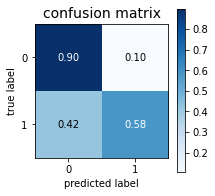

In [36]:
Execute(logreg)

<module 'matplotlib.pyplot' from 'C:\\Users\\thego\\Documents\\Data science projects\\virtualEnv\\lib\\site-packages\\matplotlib\\pyplot.py'>

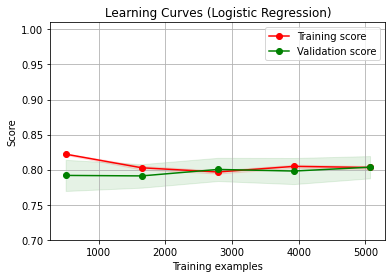

In [133]:
#plot learning curve
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, x_train, y_train, ylim=(0.7,1.01), cv=cv, n_jobs=1)

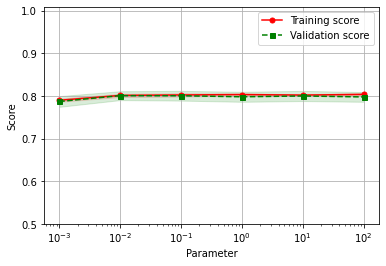

In [135]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=x_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

Model score:  0.9980475683351083
Test Score:  0.7998580553584103
AUC score:  0.7145530674813394
CV accuracy: 0.786 +/- 0.020

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.55      0.57       348

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



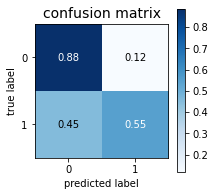

In [37]:
Execute(rf)

Model score:  0.6551295704650337
Test Score:  0.6657203690560681
AUC score:  0.7432805746043094
CV accuracy: 0.657 +/- 0.015

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.59      0.73      1061
           1       0.42      0.90      0.57       348

    accuracy                           0.67      1409
   macro avg       0.68      0.74      0.65      1409
weighted avg       0.82      0.67      0.69      1409



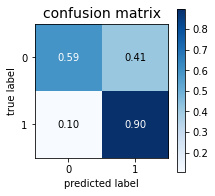

In [38]:
Execute(nb)

Model score:  0.8317358892438764
Test Score:  0.7579843860894251
CV accuracy: 0.765 +/- 0.014

Classification report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1061
           1       0.51      0.46      0.49       348

    accuracy                           0.76      1409
   macro avg       0.67      0.66      0.66      1409
weighted avg       0.75      0.76      0.75      1409



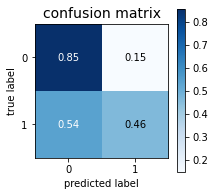

In [145]:
Execute(knn)

Model score:  0.9980475683351083
Test Score:  0.7395315826827538
CV accuracy: 0.723 +/- 0.023

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1061
           1       0.48      0.53      0.50       348

    accuracy                           0.74      1409
   macro avg       0.66      0.67      0.66      1409
weighted avg       0.75      0.74      0.74      1409



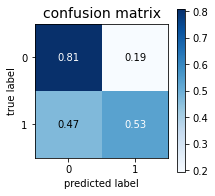

In [147]:
Execute(d_tree)